# Formalized Problem
    1. Given a gene matrix, correct for gene expression drop out

# Create Data for PCA

In [259]:
import numpy as np
import math
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA as sklearnPCA

#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Create Cell Data

In [2]:
np.random.seed(4294967295) # random seed for consistency

# Cell 1 Data

In [606]:
#Set parameters
mean_cell1 = [10]*10#[8,8,8,8,7,7,9,7,8,8]
cov = np.identity(10) 
cell1 = np.random.multivariate_normal(mean_cell1, cov, 30)
shape(cell1)

(30, 10)

# Cell 2 Data

In [607]:
mean_cell2 = [5]*10#[4,4,2,3,4,3,4,5,4,4]
cov = np.identity(10) 
cell2 = np.random.multivariate_normal(mean_cell2, cov, 30)
shape(cell2)


(30, 10)

# Cell 3 Data

In [608]:
mean_cell3 = [1]*10#[2,1,1,2,2,1,1,1,2,2]
cov = np.identity(10) 
cell3 = np.random.multivariate_normal(mean_cell3, cov, 30)
cell3 = np.abs(cell3)
shape(cell3)

(30, 10)

# Dimension Viz + Plot without Drop Out 

In [609]:
#Cell PCA
#feature space/genes = 10, samples = 90
#each element is the level of expression (log read count) of the jth gene, ith sample

t = np.concatenate((cell1, cell2, cell3),)
print shape(t)
pca1 = sklearnPCA(n_components=5)
fitted1 = pca1.fit(t)
trans1 = pca1.transform(t)
shape(trans1)

(90, 10)


(90, 5)

In [610]:
# #Cell 2 PCA
# pca2 = sklearnPCA(n_components=10)
# fitted2 = pca2.fit(cell2)
# trans2 = pca2.transform(cell2) 

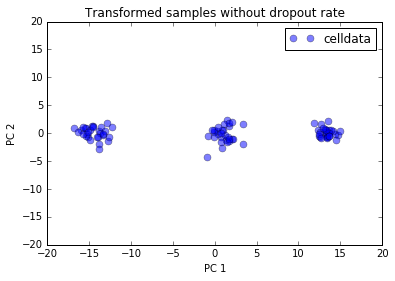

In [628]:
plt.plot(trans1[:,0], trans1[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='celldata')

#plt.plot(trans2[:,0], trans2[:,1], '^', markersize=7, color='red', alpha=0.5, label='cell2')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.legend()
plt.title('Transformed samples without dropout rate')

plt.show()

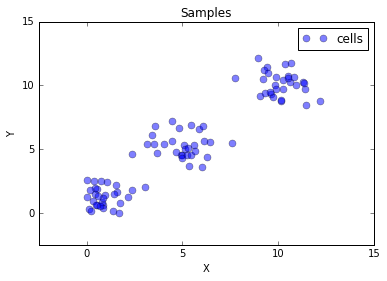

In [629]:
plt.plot(t[:,0], t[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='cells')
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim([-2.5,15])
plt.ylim([-2.5,15])
plt.legend()
plt.title('Samples')

plt.show()

# Drop out rate parameters

In [613]:
#mu is the mean vector aka centroid
def drop_out(exp):
    p = math.e**(-.1 * exp**2)
    return np.random.binomial(1, p, 1)[0]

In [614]:
noise_1 = .1 * np.random.randn(shape(t)[0], shape(t)[1]) 
# noise_2 = .1 * np.random.randn(shape(cell2)[0], shape(cell2)[1]) 

In [615]:
nsd1 = np.copy(t) + np.copy(noise_1)
#nsd2 = np.copy(cell2) + np.copy(noise_2)

In [616]:
count = 0
for (i,j), value in numpy.ndenumerate(nsd1):
    if (drop_out(value) == 1):
        count += 1
        nsd1[i,j] = 0
print count

289


In [617]:
shape(nsd1)

(90, 10)

In [618]:
nsd1

array([[ 10.27370868,  10.39502025,  11.45429621,  11.72163782,
          9.71265209,  10.41892139,   9.32647898,  11.00035518,
          9.03263335,  10.88026694],
       [ 10.39586905,  10.716222  ,   8.9274426 ,   8.81093791,
          8.2864377 ,  11.27533845,   9.50104375,  10.40888846,
          8.57924907,  10.78198412],
       [ 10.12002344,   9.57095289,   9.56701854,   9.62791217,
          8.70871979,   8.2745448 ,  10.63557137,   9.39241611,
          8.03583149,   9.89577654],
       [ 10.96227252,  11.74926454,   8.44693385,   8.42121332,
         11.93014306,  10.78661386,   9.09376487,   9.34044363,
          8.17767344,  11.01336622],
       [  7.66171078,  10.53107434,   9.45867344,  10.20221119,
          8.32316759,  10.28015247,  10.80213725,   9.72927516,
         10.16252091,   9.22264325],
       [ 10.12987556,   8.76329607,   9.64147265,  10.54857003,
         10.87801108,  10.97865686,   8.7370207 ,  11.00471863,
          8.67418092,  11.27803768],
       [ 1

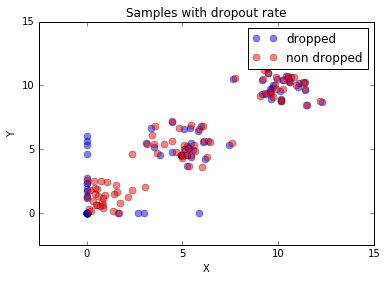

In [619]:
plt.plot(nsd1[:,0], nsd1[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='dropped')
plt.plot(t[:,0], t[:,1], 'o', markersize=7, color='red', alpha=0.5, label='non dropped')
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim([-2.5,15])
plt.ylim([-2.5,15])
plt.legend()
plt.title('Samples with dropout rate')

plt.show()

# With Dropout Visualization

In [620]:
#Cell PCA
#feature space = 90, samples = 10
pca2 = sklearnPCA(n_components=5)
fitted1 = pca2.fit(nsd1)
trans2 = pca2.transform(nsd1)
shape(trans2)
pca2.explained_variance_ratio_ 

array([ 0.91845853,  0.01661833,  0.01394443,  0.01065794,  0.00936581])

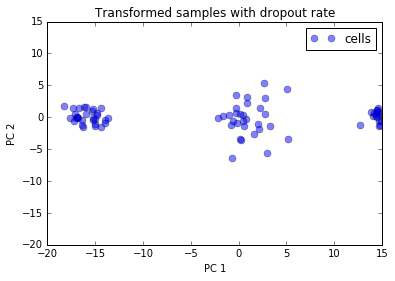

In [621]:
plt.plot(trans2[:,0], trans2[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='cells')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim([-20,15])
plt.ylim([-20,15])
plt.legend()
plt.title('Transformed samples with dropout rate')

plt.show()

In [622]:
ls =np.concatenate((trans2[:,0], trans2[:,1]))

# Methods

In [638]:
def find_avgWithinSS(matrix, maxclusters=10):
    K = range(1, maxclusters)
    KM = [kmeans(matrix,k) for k in K]
    centroids = [cent for (cent,var) in KM]   
    D_k = [cdist(matrix, cent, 'euclidean') for cent in centroids]
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/matrix.shape[0] for d in dist]
    return avgWithinSS

def find_centroid(matrix):
    K = findK(find_avgWithinSS(matrix))
    KM = [kmeans(matrix, K)]
    centroids = [cent for (cent,var) in KM]
    return centroids

def findK(points, num_derivatives=3):
    for x in range(0,num_derivatives):
        points = np.diff(points)
    ret = (list(points))
    ret = [abs(p) for p in points]
    print ret
    return ret.index(max(ret))

# def findK(points, tol = .90):
#     cache = []
#     for p in range(len(points) - 1):
#         diff = points[p] - points[p + 1]
#         cache.append(diff)
#     count = 0
#     buff = 0
#     while(buff/sum(cache) < tol):
#         buff += cache[count]
#         count += 1
#     print buff
#     return count + 1

In [639]:
findK(find_avgWithinSS(trans2))

[0.4391748983076833, 2.9618727544186565, 0.086399241814029804, 0.024530558250577705, 0.012687818263815487, 0.0017500552826308358]


1

In [632]:
found

3

[5.8323026607585398, 3.2290740668868638, 0.18702096171414428, 0.08467659009136419, 0.1465737906046285, 0.1143393888570805, 0.035642155695948752, 0.02441221453989284]
K 0


IndexError: list index out of range

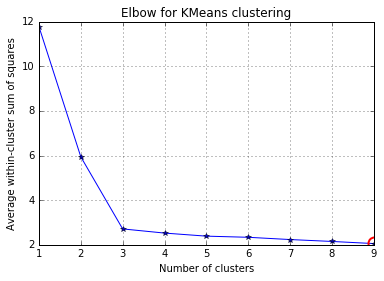

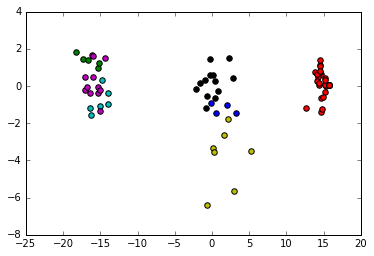

In [633]:
maxclusters=10
##### plot ###
avg = find_avgWithinSS(trans2)
found = findK(avg)
print "K", found
kIdx = found - 1
K = range(1, maxclusters)
KM = [kmeans(trans2,k) for k in K]
centroids = [cent for (cent,var) in KM]   
D_k = [cdist(trans2, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, find_avgWithinSS(trans2), 'b*-')
ax.plot(K[kIdx], find_avgWithinSS(trans2)[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

# scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(trans2[ind,0],trans2[ind,1], s=30, c=clr[i], label='Cluster %d'%i)
plt.xlabel('Y')
plt.ylabel('X')
plt.xlim([-20,15])
plt.ylim([-20,15])
plt.title('Cells, KMeans clustering with K=%d' % K[kIdx])
#plt.legend()

plt.show()
print len(centroids)

In [627]:
rm1 = find_centroid(nsd1)[0][0]
rm2 = find_centroid(nsd1)[0][1]
rm3 = find_centroid(nsd1)[0][1]
centroids = [rm1, rm2, rm3]

8.65601070681
8.65601070681
8.65601070681


5.84540720793
K 3


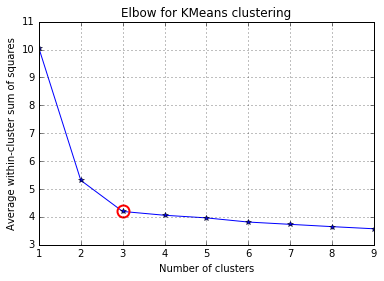

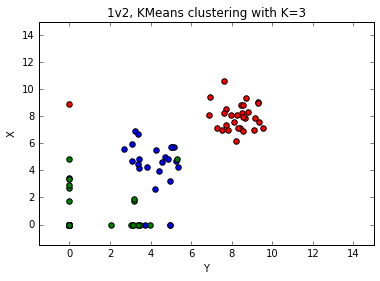

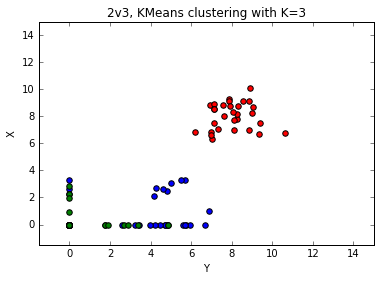

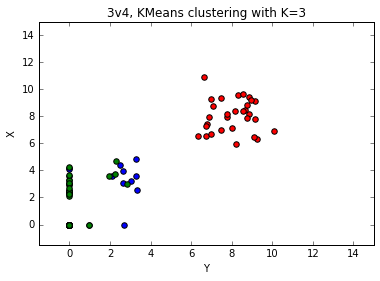

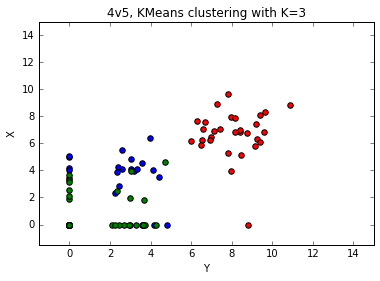

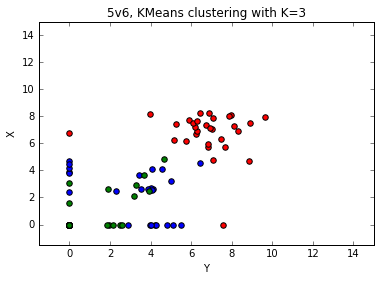

In [604]:
maxclusters=10
##### plot ###
avg = find_avgWithinSS(nsd1)
found = findK(avg)
print "K", found
kIdx = found - 1
K = range(1, maxclusters)
KM = [kmeans(nsd1,k) for k in K]
centroids = [cent for (cent,var) in KM]   
D_k = [cdist(nsd1, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, find_avgWithinSS(nsd1), 'b*-')
ax.plot(K[kIdx], find_avgWithinSS(nsd1)[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

# scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(nsd1[ind,0],nsd1[ind,1], s=30, c=clr[i], label='Cluster %d'%i)
plt.xlabel('Y')
plt.ylabel('X')
plt.xlim([-1.5,15])
plt.ylim([-1.5,15])
plt.title('1v2, KMeans clustering with K=%d' % K[kIdx])
#plt.legend()

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(nsd1[ind,1],nsd1[ind,2], s=30, c=clr[i], label='Cluster %d'%i)
plt.xlabel('Y')
plt.ylabel('X')
plt.xlim([-1.5,15])
plt.ylim([-1.5,15])
plt.title('2v3, KMeans clustering with K=%d' % K[kIdx])
#plt.legend()

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(nsd1[ind,2],nsd1[ind,3], s=30, c=clr[i], label='Cluster %d'%i)
plt.xlabel('Y')
plt.ylabel('X')
plt.xlim([-1.5,15])
plt.ylim([-1.5,15])
plt.title('3v4, KMeans clustering with K=%d' % K[kIdx])
#plt.legend()

plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(nsd1[ind,3],nsd1[ind,4], s=30, c=clr[i], label='Cluster %d'%i)
plt.xlabel('Y')
plt.ylabel('X')
plt.xlim([-1.5,15])
plt.ylim([-1.5,15])
plt.title('4v5, KMeans clustering with K=%d' % K[kIdx])
#plt.legend()

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(nsd1[ind,4],nsd1[ind,5], s=30, c=clr[i], label='Cluster %d'%i)
plt.xlabel('Y')
plt.ylabel('X')
plt.xlim([-1.5,15])
plt.ylim([-1.5,15])
plt.title('5v6, KMeans clustering with K=%d' % K[kIdx])
#plt.legend()

plt.show()
